# Edge detection and morphological operations

In [1]:
import cv2 as cv
import numpy as np
import requests
from matplotlib import pyplot as plt

## Image import

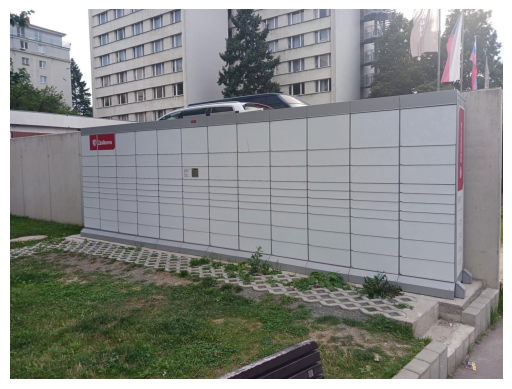

In [2]:
# Image URL
url = "https://d48-a.sdn.cz/d_48/c_img_oc_A/nO0bgvR9rXB3JbEUCEH2z6g/ba83.jpeg?fl=res,2200,2200,1"

# Download the image
resp = requests.get(url)

img_array = np.frombuffer(resp.content, np.uint8)

# Decode image (OpenCV reads in BGR)
img = cv.imdecode(img_array, cv.IMREAD_COLOR)

# Convert BGR → RGB for Matplotlib
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display
plt.imshow(img)
plt.axis("off")
plt.show()

## Canny edge detector

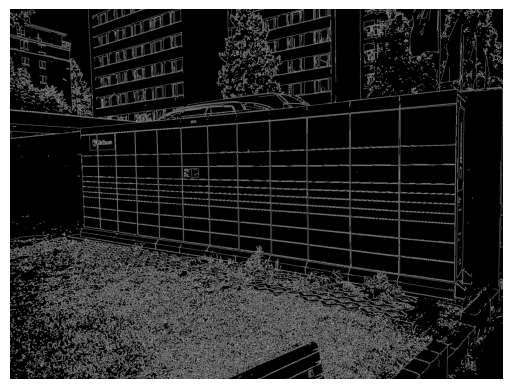

In [3]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Canny edge detector
edges = cv.Canny(gray, threshold1=125, threshold2=230)

# Show result
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

## Sobel filter

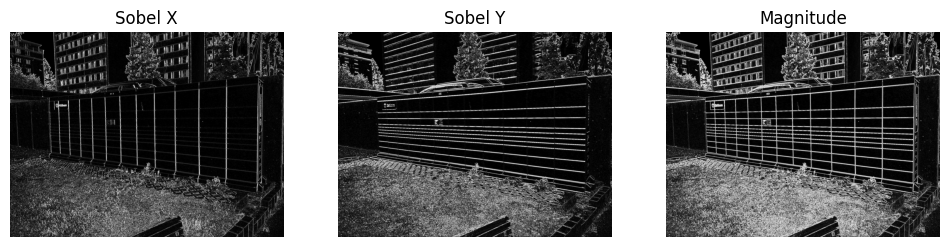

In [4]:
# Convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Sobel gradients in x and y
grad_x = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
grad_y = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)

# Magnitude of gradients
magnitude = cv.magnitude(grad_x, grad_y)
magnitude = cv.convertScaleAbs(magnitude)

# Show results
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(cv.convertScaleAbs(grad_x), cmap="gray")
plt.title("Sobel X")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv.convertScaleAbs(grad_y), cmap="gray")
plt.title("Sobel Y")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(magnitude, cmap="gray")
plt.title("Magnitude")
plt.axis("off")

plt.show()

## Morhpological operations


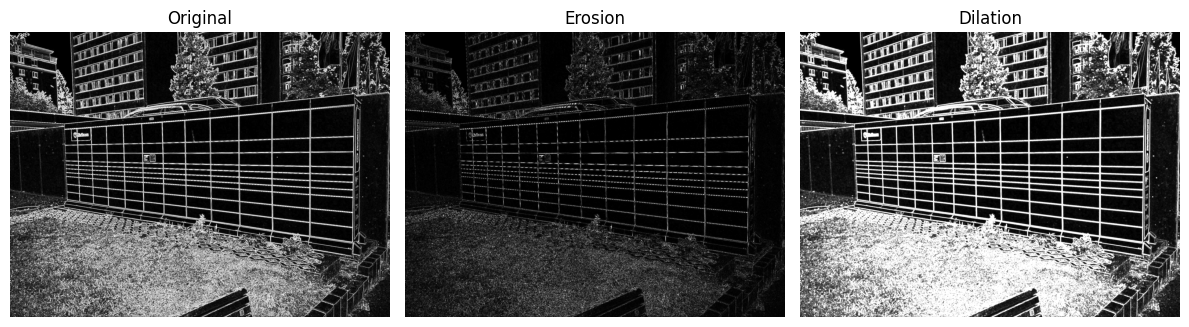

In [5]:
# Do the detection
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#edges = cv.Canny(gray, threshold1=125, threshold2=230)
grad_x = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
grad_y = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)
magnitude = cv.magnitude(grad_x, grad_y)
edges = cv.convertScaleAbs(magnitude)

# Define a kernel
kernel = np.ones((3, 3), np.uint8)

# Apply erosion and dilation
erosion = cv.erode(edges, kernel, iterations=1)
dilation = cv.dilate(edges, kernel, iterations=1)

# Show results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(edges, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Erosion')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dilation, cmap='gray')
plt.title('Dilation')
plt.axis('off')

plt.tight_layout()
plt.show()